In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy  as sp
import numpy  as np
import mpmath as mp
import numpy  as np
import matplotlib.pyplot as plt
import os

from scipy.stats import wasserstein_distance
from scipy.signal import find_peaks

In [ ]:
theta0 = 45 * (np.pi / 3.14) 
omega0 = 0.0 

L = 1
m = 1
g = 9.80665

### Sem Atrito
$$\ddot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

In [ ]:
def edo(t, y):
    theta, omega = y
    return [omega, -(g/L)*mp.sin(theta)]

f1 = mp.odefun(edo, 0.0, [theta0, omega0])
f1

<function mpmath.calculus.odes.odefun.<locals>.interpolant(x)>

### Com Atrito
$$\ddot{\theta} + \alpha\cdot\dot{\theta} + \frac{g}{L}\cdot sin(\theta) = 0$$

Como achar $\alpha$ experimentalmente?

- $\alpha = \frac{1}{Q} \cdot \sqrt{\frac{g}{L}}$ 
- $Q$ é o numero de vezes que o pendulo oscila (vai e volta até a posição inicial) até parar (chegar a $\approx$ 4% da sua amplitude inicial)

In [21]:
Q = 14 # quantas vezes ele oscila até parar
alpha = 1/Q * mp.sqrt(g/L)

In [22]:
def edo(t, y):
    theta, omega = y
    return [omega, - (alpha)*omega - (g/L)*mp.sin(theta)]

f2 = mp.odefun(edo, 0.0, [theta0, omega0])
f2

<function mpmath.calculus.odes.odefun.<locals>.interpolant(x)>

# IMPLEMENTAÇÃO

In [23]:
f = f2
dt = 0.001

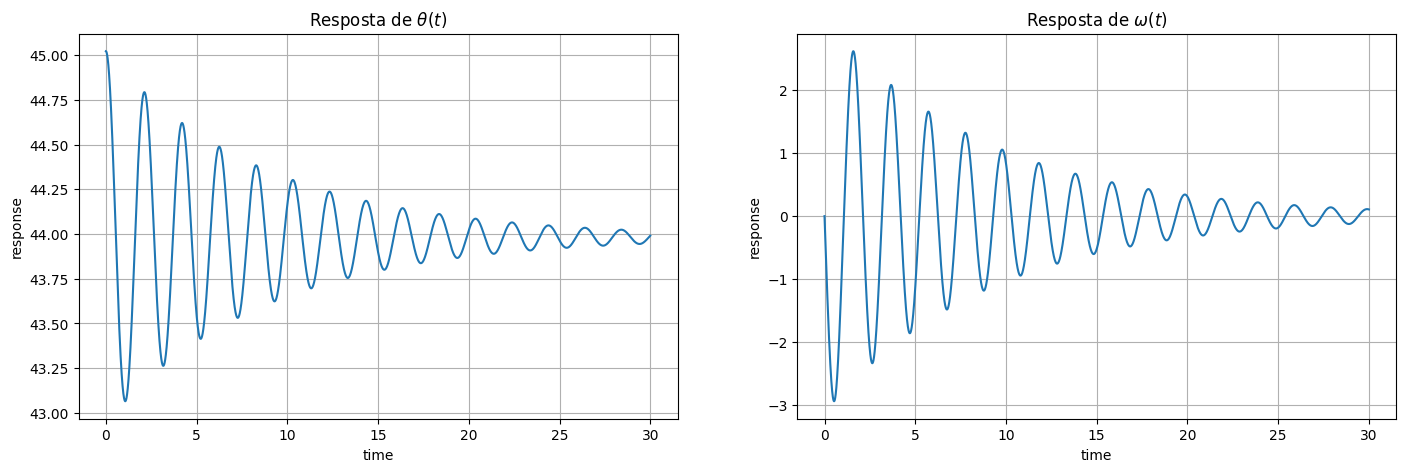

In [24]:
time     = np.arange(0, 30, dt)
response = [f(t) for t in time]
theta = np.array([float(theta) for (theta, omega) in response])
omega = np.array([float(omega) for (theta, omega) in response])

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, theta)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\theta(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, omega)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $\omega(t)$')
plt.show()

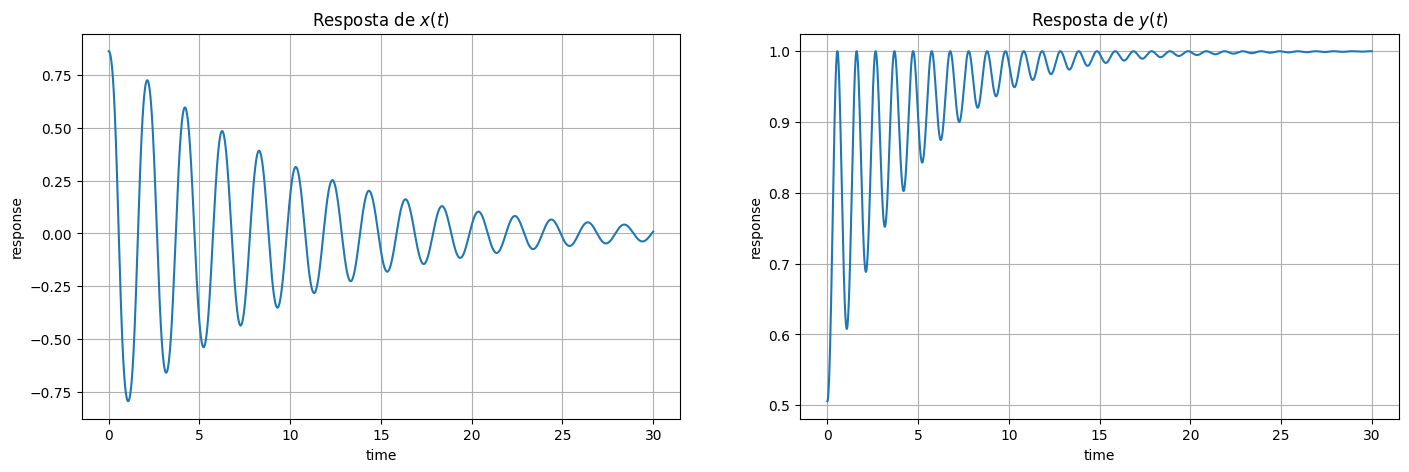

In [25]:
x = L * np.sin(theta)
y = L * np.cos(theta)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(time, x)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $x(t)$')
plt.subplot(1, 2, 2)
plt.plot(time, y)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $y(t)$')
plt.show()

In [26]:
df = pd.DataFrame({
    'time': time,
    'theta': theta,
    'omega': omega,
    'x': x,
    'y': y
})

df

,time,theta,omega,x,y
0,0.000,45.022825,0.000000,0.862671,0.505765
1,0.001,45.022820,-0.008459,0.862669,0.505769
2,0.002,45.022808,-0.016916,0.862663,0.505780
3,0.003,45.022787,-0.025371,0.862652,0.505798
4,0.004,45.022757,-0.033824,0.862637,0.505824
...,...,...,...,...,...
29995,29.995,43.990458,0.106682,0.008161,0.999967
29996,29.996,43.990565,0.106577,0.008268,0.999966
29997,29.997,43.990671,0.106472,0.008374,0.999965
29998,29.998,43.990778,0.106365,0.008481,0.999964


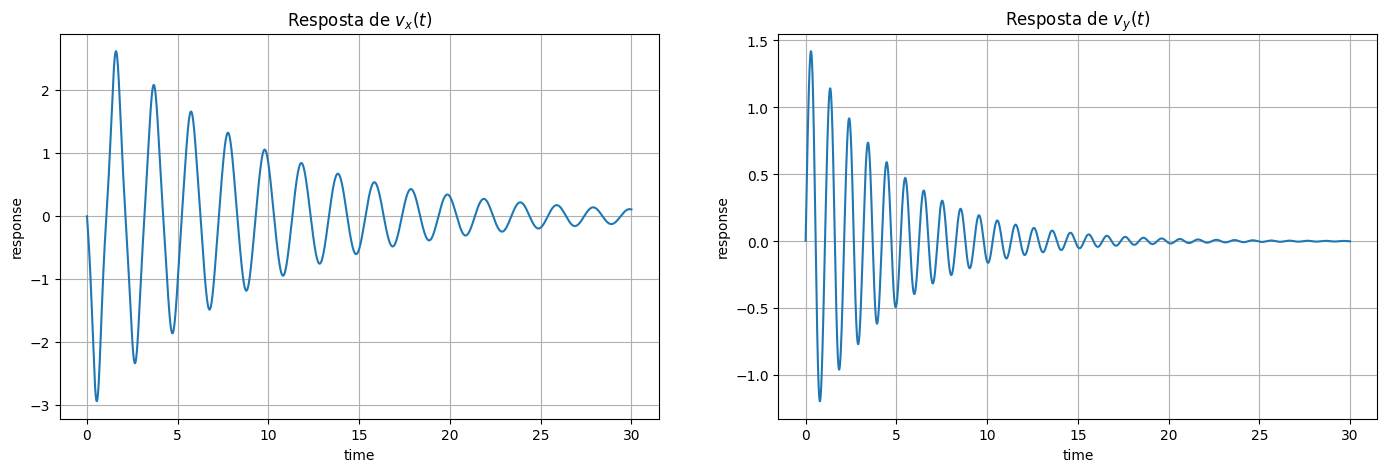

In [27]:
df['vx'] = np.gradient(df.x, dt)
df['vy'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $v_y(t)$')
plt.show()

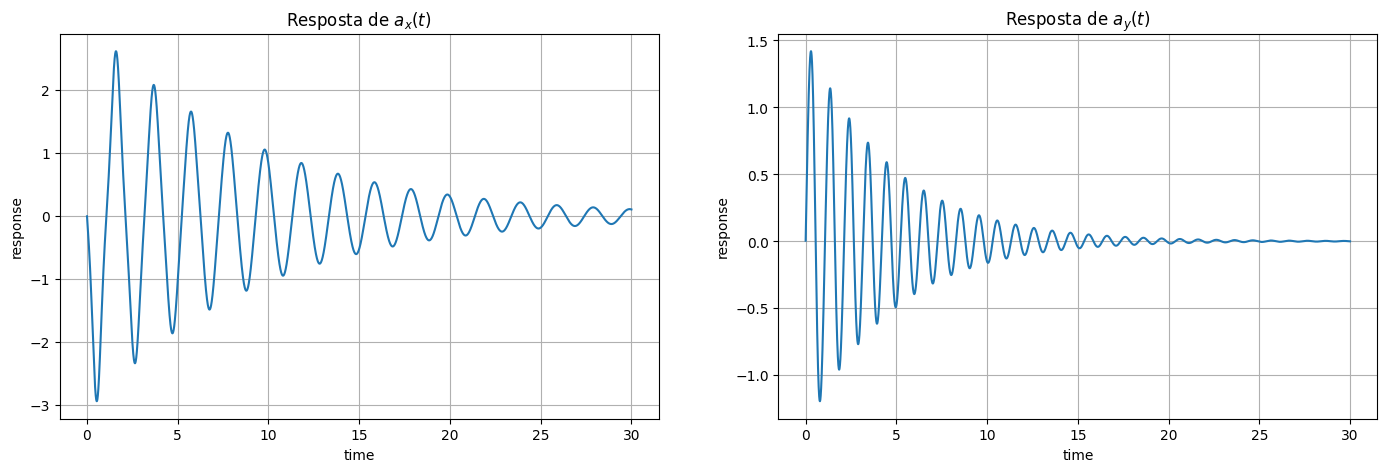

In [28]:
df['ax'] = np.gradient(df.x, dt)
df['ay'] = np.gradient(df.y, dt)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.vx)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_x(t)$')
plt.subplot(1, 2, 2)
plt.plot(df.time, df.vy)
plt.xlabel('time'); plt.ylabel('response'); plt.grid()
plt.title(r'Resposta de $a_y(t)$')
plt.show()

In [29]:
pendulum = df.copy()
pendulum

,time,theta,omega,x,y,vx,vy,ax,ay
0,0.000,45.022825,0.000000,0.862671,0.505765,-0.002139,0.003649,-0.002139,0.003649
1,0.001,45.022820,-0.008459,0.862669,0.505769,-0.004278,0.007297,-0.004278,0.007297
2,0.002,45.022808,-0.016916,0.862663,0.505780,-0.008556,0.014592,-0.008556,0.014592
3,0.003,45.022787,-0.025371,0.862652,0.505798,-0.012833,0.021886,-0.012833,0.021886
4,0.004,45.022757,-0.033824,0.862637,0.505824,-0.017109,0.029178,-0.017109,0.029178
...,...,...,...,...,...,...,...,...,...
29995,29.995,43.990458,0.106682,0.008161,0.999967,0.106678,-0.000871,0.106678,-0.000871
29996,29.996,43.990565,0.106577,0.008268,0.999966,0.106574,-0.000881,0.106574,-0.000881
29997,29.997,43.990671,0.106472,0.008374,0.999965,0.106468,-0.000892,0.106468,-0.000892
29998,29.998,43.990778,0.106365,0.008481,0.999964,0.106361,-0.000902,0.106361,-0.000902


# DADOS REAIS

In [ ]:
tables  = [os.path.join('files', file) for file in os.listdir('files') if '.csv' in file]
indexes = sorted([int(tab.replace('.', '_').split('_')[-2]) for tab in tables])
files   = [os.path.join('files', f'test_{i}.csv') for i in indexes]

df   = pd.DataFrame()
time = 0.00

for path in files:
    data = pd.read_csv(path)
    data["time"] = (data.time.values - data.time.values[0]) + time

    df   = pd.concat([df, data], axis=0)
    time = df.time.max()

df

,wy,ay,yaw,wx,time,az,wz,pitch,ax,roll
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.0
3,-1.0,135.0,0.0,0.0,0.480000,-6.0,0.0,0.0,-479.0,0.0
4,-1.0,135.0,0.0,0.0,0.480000,-6.0,0.0,0.0,-479.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10359,10.0,78.0,33886.0,-2.0,113.799997,-294.0,4.0,902.0,-394.0,12696.0
10360,9.0,78.0,33886.0,0.0,113.809999,-294.0,3.0,902.0,-394.0,12696.0
10361,9.0,78.0,33886.0,-1.0,113.820001,-294.0,4.0,902.0,-394.0,12697.0
10362,13.0,78.0,33888.0,1.0,113.900003,-295.0,5.0,905.0,-394.0,12706.0


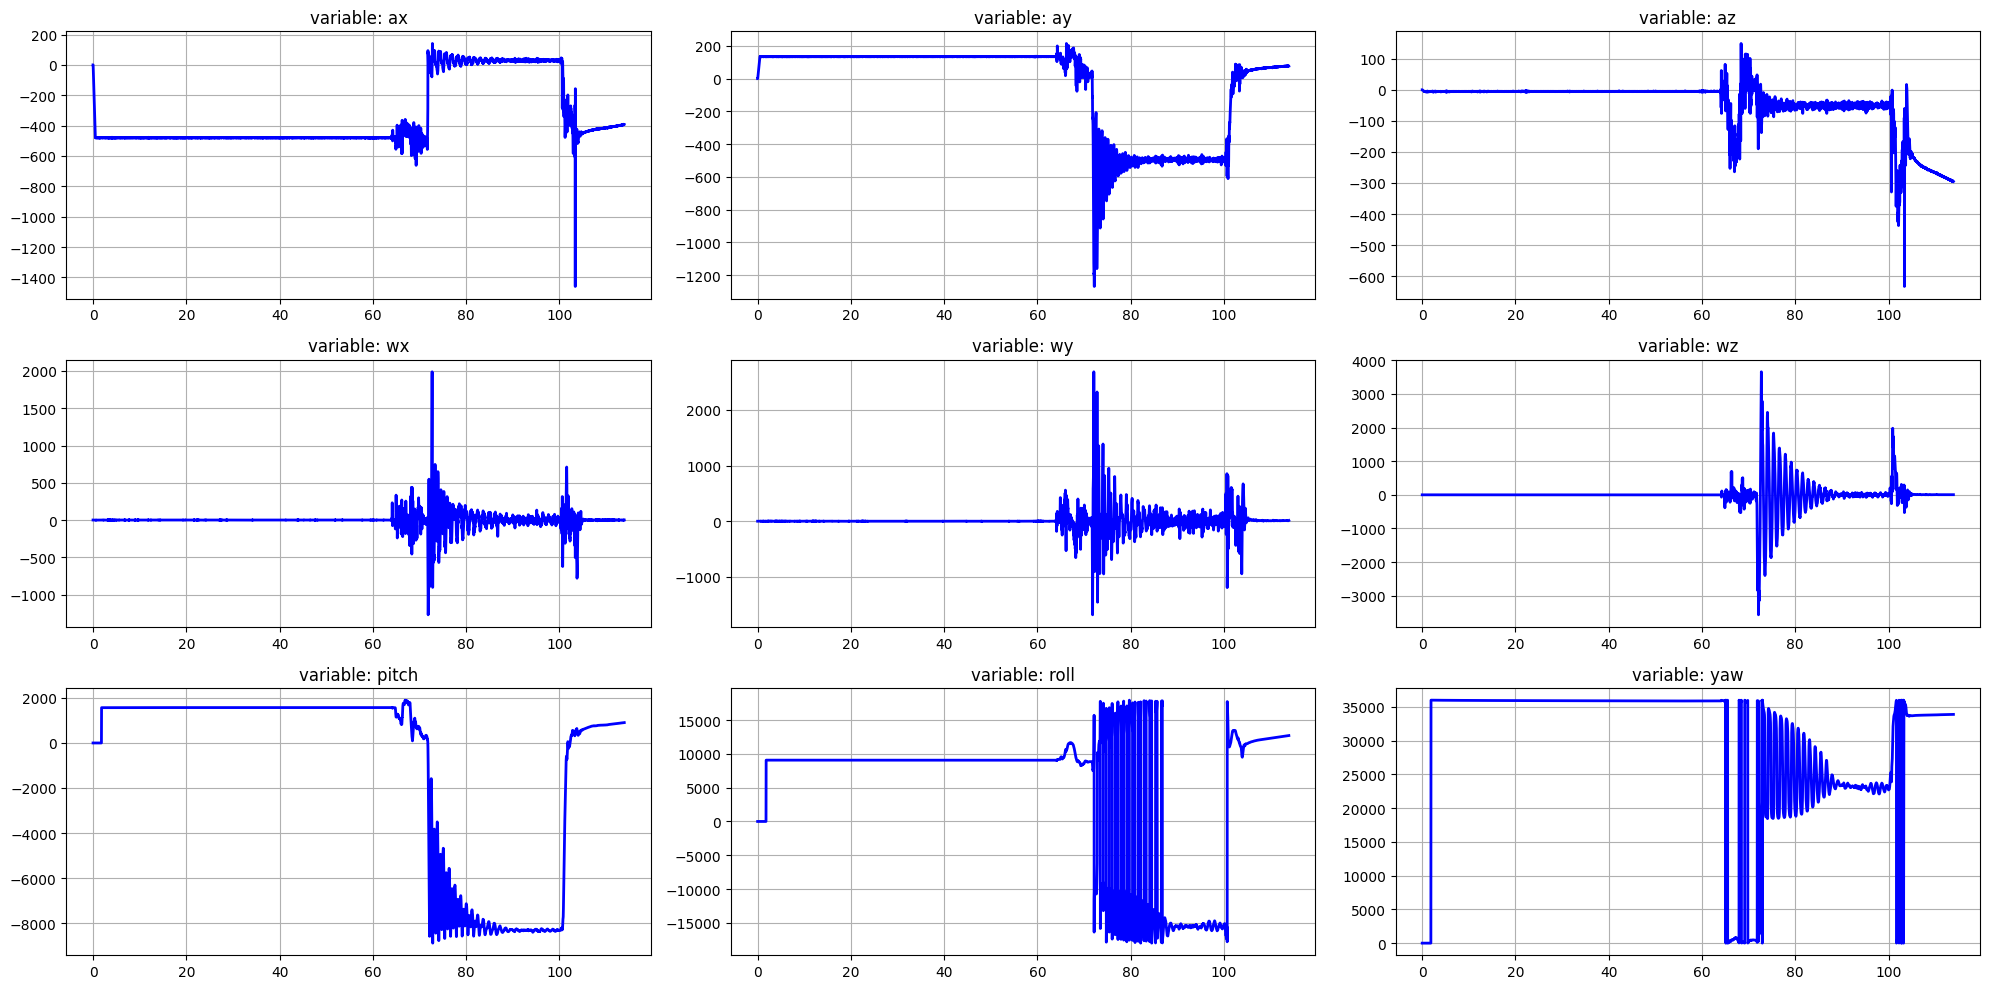

In [31]:
def plotAll(df, limits=None):
    limits = list(limits) if limits is not None else [None, None]

    if limits[0] is None:
        limits[0] = 0

    if limits[1] is None:
        limits[1] = df.time.values[-1]

    target = df.loc[(df.time >= limits[0]) & (df.time <= limits[1])]

    plt.figure(figsize=(20, 10))
    for i, key in enumerate(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'pitch', 'roll', 'yaw']):
        plt.subplot(3, 3, i+1)
        plt.plot(target.time, target[key], color='blue', linewidth=2)
        plt.title(f'variable: {key}'), plt.grid()

    plt.tight_layout()
    plt.show()


plotAll(df, limits=None)

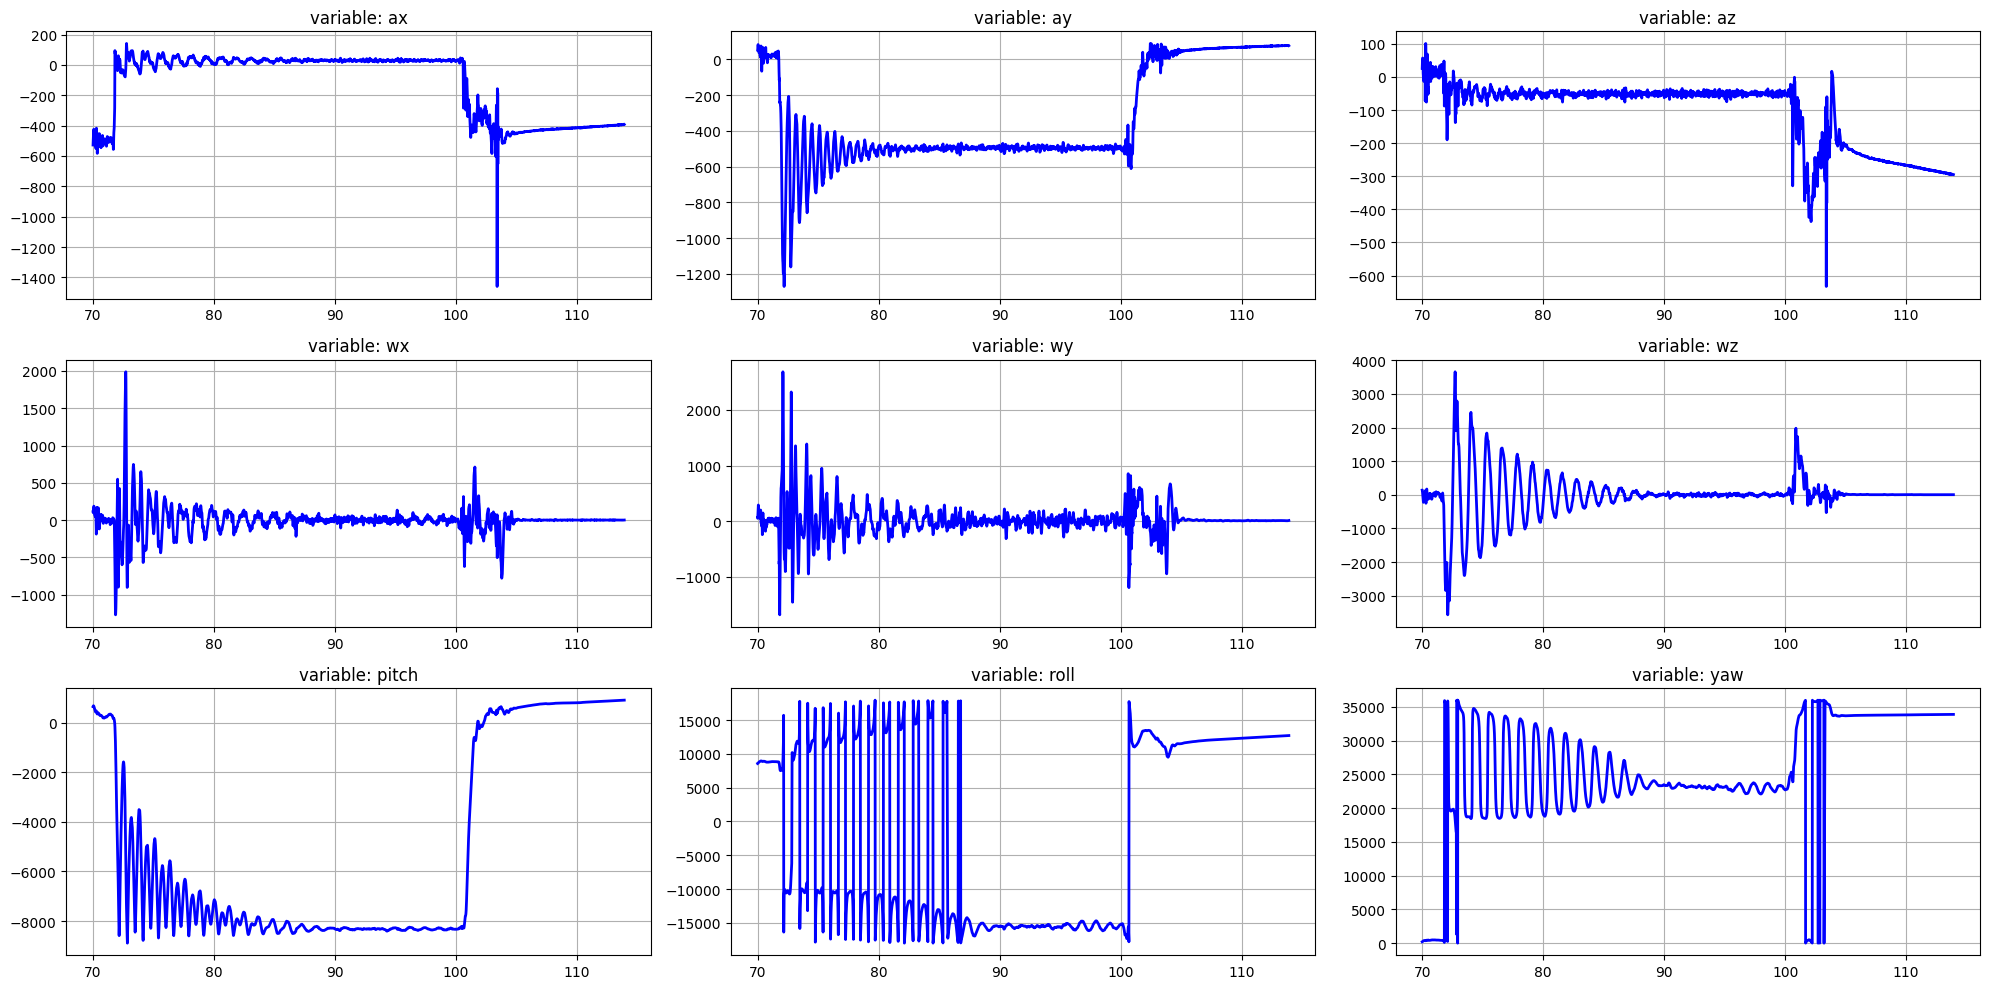

In [32]:
plotAll(df, limits=(70, None))

In [33]:
sensor = df.loc[(df.time > 70) & (df.time < 90)].copy()
target = 'wz'

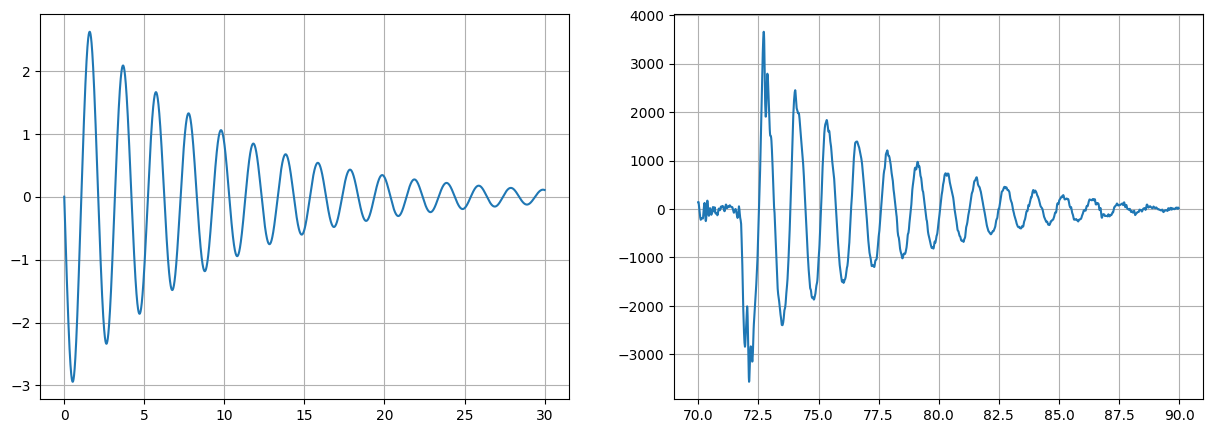

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(pendulum.time, pendulum.omega)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(sensor.time, sensor[target])
plt.grid()

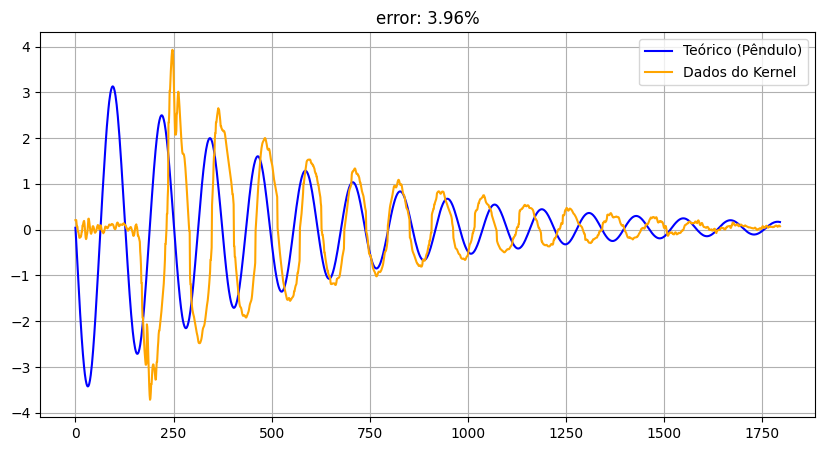

In [35]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2, phase=0, plot=False):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    data2 = data2[phase:]

    n_samples = min(len(data1), len(data2))
    samples1 = np.linspace(0, len(data1)-1, n_samples, dtype=int)
    samples2 = np.linspace(0, len(data2)-1, n_samples, dtype=int)

    data1 = data1[samples1]
    data2 = data2[samples2]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(data1, color='blue', label='Teórico (Pêndulo)')
        plt.plot(data2, color='orange',  label='Dados do Kernel')
        plt.title(f'error: {score*100:.2f}%')
        plt.legend(), plt.grid()
        plt.show()

    return (data1, data2, score)


result = compare(pendulum.omega, sensor[target], plot=True)

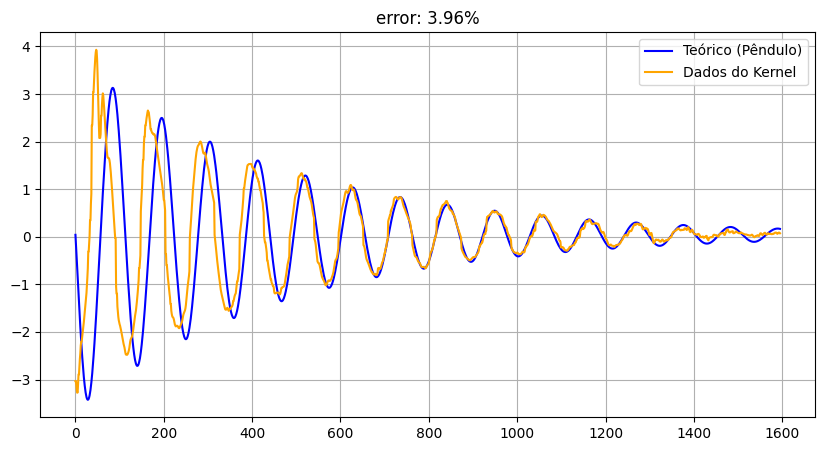

In [36]:
result = compare(pendulum.omega, sensor[target], plot=True, phase=200)